### Advanced Python AI and ML Tools - Assignment 1

__Group Members:__
1) Aanal Patel - C0910376
2) Bimal Shresta - C0919385
3) Danilo Diaz - C0889539
4) Ernie Sumoso - C0881591

### Index
- __Step 1. Dataset Description (web scrapped)__
- __Step 2. Data Wrangling (cleaning, formatting, structuring, validating)__
    - __Step 9. NLP techniques: data cleaning, stopword and puctuation removal, tokenizing, ngrams analysis__
- __Step 3. Plotting methods for distribution__
- __Step 4. Pandas profiling for EDA (exploratory data analysis)__
- __Step 5. Encoding methods, creating new numerical columns__
- __Step 6. Outlier identification (with boxplots and IQR)__
- __Step 7. Addressing outliers with Quantile-based flooring and capping, Trimming, and Log Transformation__
- __Step 8. Unsupervised learning methods__

### Step 1. Dataset Description (web scrapped)

(Bimal add a description of what you did to web scrap the data here, what is the source and what were your steps)

In [94]:
import pandas as pd

# reading the web scrapped data from CSV file, setting the index column
df = pd.read_csv("../data/raw/jobs.csv", index_col=0)

# displaying the raw data
df.tail()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
2610,Level 2/3 Support Engineer,Fuse Technology Pty Ltd,NaN,Sydney NSW,Help Desk & IT Support (Information & Communic...,Full time,The opportunityAs part of our exciting growth ...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73930150?type=stan...
2611,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,Labourforce,$47 per hour + penalties,"Wetherill Park, Sydney NSW","Warehousing, Storage & Distribution (Manufactu...",Contract/Temp,Our client is one of Australia's leading Manuf...,NaN,2024-02-21,https://www.seek.com.au/job/73870879?type=stan...
2612,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...
2613,Studio Assistant,Cendre,NaN,"Oxenford, Gold Coast QLD","Pickers & Packers (Manufacturing, Transport & ...",Full time,Cendré is a revered e-commerce jewellery brand...,NaN,2024-02-21,https://www.seek.com.au/job/73875587?type=stan...
2614,Junior IT Support Officer,Hare & Forbes,NaN,"Northmead, Sydney NSW",Help Desk & IT Support (Information & Communic...,Full time,"Parramatta locationWork with a close-knit, exp...",Do you have demonstrated experience diagnosing...,2024-02-21,https://www.seek.com.au/job/73868216?type=stan...


In [95]:
# display the number of rows, columns and the column names
def display_shape_and_colnames(df):
    print("Number of Rows:", df.shape[0])
    print("Number of Columns:", df.shape[1])
    print(df.columns)
    
display_shape_and_colnames(df)

Number of Rows: 9800
Number of Columns: 10
Index(['title', 'company', 'salary', 'location', 'department', 'type',
       'description', 'company_questions', 'posted_date', 'link'],
      dtype='object')


Some of our __column names__ are __redundant__ because we are working with job data.

Let's delete the prefix __"job"__ from our column names.

Some other __column names__ are __abbreviated__ (e.g. "job_desc", "company_qns").

Let's __replace them with full names__ so we can have accurate column names.

In [96]:
def clean_colnames(df):
    # delete the prefix "job_" on our column names
    for column_name in df.columns.to_list():
        if column_name.startswith("job_"):
            df.rename(columns={column_name : column_name.lstrip("job_")}, inplace=True)

    # rename abbreviated column names
    df.rename(columns={'desc':'description', 'company_qns':'company_questions', 'post':'department'}, inplace=True)

clean_colnames(df)
# display clean column names
df.head(2)

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,Experienced Support Worker (PPT & CAS),Ability Gateway,$35.50 per hour [PPT],"Wagga Wagga, Wagga Wagga & Riverina NSW",Aged & Disability Support (Community Services ...,Part time,About usWe are an outcome focused NDIS service...,Do you own or have regular access to a car?Whi...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,Regional Manager - Inspire@HOME,CatholicCare Tasmania,NaN,"Launceston, Launceston & North East TAS","Child Welfare, Youth & Family Services (Commun...",Full time,CatholicCare Tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...


Now let's undestand all of our columns by providing a description to each one:
- __title__: title of the posted job
- __company__: name of the company that has posted the job
- __salary__: salary range for the job, can be defined per hour, monthly, annually, etc.
- __location__: geographical location of the job or company
- __department__: field or department of the job (e.g. IT, Sales, etc.)
- __description__: long description of the job posting
- __company_questions__: questions issued by the company to the applicants, according to the post
- __posted_date__: format yyyy-mm-dd
- __link__: link of the job posting

Now that we have a general understanding of our web scrapped data. 

Let's go ahead to the next step to perform our data wrangling methods.

### __Step 2.__ Data Wrangling (cleaning, formatting, structuring, validating)
### (includes __Step 9.__ NLP techniques: data cleaning, stopword and puctuation removal, tokenizing, ngrams analysis)

First of all, we have 9800 rows, however the index values are repetead thrice because of the CSV contents.

Let's start by reseting the index to have proper index values.

In [97]:
# reset the rows index
df.reset_index(inplace=True, drop=True)
df.tail()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
9795,Level 2/3 Support Engineer,Fuse Technology Pty Ltd,NaN,Sydney NSW,Help Desk & IT Support (Information & Communic...,Full time,The opportunityAs part of our exciting growth ...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73930150?type=stan...
9796,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,Labourforce,$47 per hour + penalties,"Wetherill Park, Sydney NSW","Warehousing, Storage & Distribution (Manufactu...",Contract/Temp,Our client is one of Australia's leading Manuf...,NaN,2024-02-21,https://www.seek.com.au/job/73870879?type=stan...
9797,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...
9798,Studio Assistant,Cendre,NaN,"Oxenford, Gold Coast QLD","Pickers & Packers (Manufacturing, Transport & ...",Full time,Cendré is a revered e-commerce jewellery brand...,NaN,2024-02-21,https://www.seek.com.au/job/73875587?type=stan...
9799,Junior IT Support Officer,Hare & Forbes,NaN,"Northmead, Sydney NSW",Help Desk & IT Support (Information & Communic...,Full time,"Parramatta locationWork with a close-knit, exp...",Do you have demonstrated experience diagnosing...,2024-02-21,https://www.seek.com.au/job/73868216?type=stan...


Now, let's perform some basic analysis on our dataset.

We will check the following stats by implementing functions:
- missing values per column
- duplicated rows
- number of unique values per column

In [98]:
def check_missing_values(df):
    # check for number of missing values per column
    print("# Missing Values")
    print(df.isna().sum())
    
    # check for % of missing values
    print("\n% Missing Values")
    print(df.isna().mean() * 100)
    
check_missing_values(df)

# Missing Values
title                   0
company                 0
salary               5216
location                0
department              0
type                    0
description             0
company_questions    5034
posted_date             0
link                    0
dtype: int64

% Missing Values
title                 0.000000
company               0.000000
salary               53.224490
location              0.000000
department            0.000000
type                  0.000000
description           0.000000
company_questions    51.367347
posted_date           0.000000
link                  0.000000
dtype: float64


As expected, many job posts do not include a salary range or any information about the salary.

It is no surprise that __more than half of our data has missing values for salary__.

We also have __more than half missing values for the company questions column__.

In [99]:
def check_duplicated_values(df):
    # check for number of duplicated values
    print("# Duplicated Values")
    print(df.duplicated().sum())
    
    # check for % of duplicated values
    print("\n% Duplicated Values")
    print(df.duplicated().mean() * 100)

check_duplicated_values(df)

df[df.duplicated()].tail(4)

# Duplicated Values
944

% Duplicated Values
9.63265306122449


,title,company,salary,location,department,type,description,company_questions,posted_date,link
9772,Pick Packers,Action Workforce,35,"Maddington, Perth WA","Warehousing, Storage & Distribution (Manufactu...",Casual/Vacation,Action Workforce are looking for Experienced P...,NaN,2024-02-21,https://www.seek.com.au/job/73901168?type=stan...
9778,Accounts Person- KALGOORLIE RESIDENTS ONLY,Golden mile cleaning services,$30 – $33.50 per hour,"Kalgoorlie, Kalgoorlie, Goldfields & Esperance WA",Administrative Assistants (Administration & Of...,Part time,Job Title: Accounts Person We are currently se...,Which of the following statements best describ...,2024-02-21,https://www.seek.com.au/job/73908087?type=prom...
9788,Warehouse Assistant,Omni Recruit,NaN,"Truganina, Melbourne VIC","Pickers & Packers (Manufacturing, Transport & ...",Casual/Vacation,Business is booming and we are currently seeki...,Do you agree to the privacy policy of Omni Rec...,2024-02-20,https://www.seek.com.au/job/73863322?type=stan...
9797,Casual Retail Assistant,Independent Living Specialists,"$31.11 per hour, plus super","Randwick, Sydney NSW",Retail Assistants (Retail & Consumer Products),Casual/Vacation,Independent Living Specialists is a fast-growi...,Do you have customer service experience?Do you...,2024-02-21,https://www.seek.com.au/job/73899163?type=stan...


Some considerable amount of our data __(around 9.5%) are duplicated__ rows.

This can be __dangerous for analysis__, we have to __deal with these duplicated values__ in future steps.

In [100]:
def check_nunique_values(df):
    # check number of unique values per column
    print("# Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "# of unique values:", df[col].nunique())
        
    # check % of unique values per column (relative to number of total rows in the dataset)
    print("\n% Unique Values per Column")
    for col in df.columns:
        print("'"+col+"'", "% of unique values:", round(df[col].nunique() * 100 / df.shape[0], 2), "%")
        
check_nunique_values(df)

# Unique Values per Column
'title' # of unique values: 5655
'company' # of unique values: 4965
'salary' # of unique values: 2639
'location' # of unique values: 1448
'department' # of unique values: 451
'type' # of unique values: 8
'description' # of unique values: 7958
'company_questions' # of unique values: 2730
'posted_date' # of unique values: 95
'link' # of unique values: 8664

% Unique Values per Column
'title' % of unique values: 57.7 %
'company' % of unique values: 50.66 %
'salary' % of unique values: 26.93 %
'location' % of unique values: 14.78 %
'department' % of unique values: 4.6 %
'type' % of unique values: 0.08 %
'description' % of unique values: 81.2 %
'company_questions' % of unique values: 27.86 %
'posted_date' % of unique values: 0.97 %
'link' % of unique values: 88.41 %


Some of our columns have a __large amount of unique values__.

The with vast amount of unique values __(>50% of total rows)__.
- title
- company
- description
- link

Let's start __dealing with the unique values per column.__

To reduce the number of unique values, let's apply some NLP methods to each column values.

We will start with some basic cleaning that includes:
- removing punctuation
- removing digits
- apply lower case to all letters
- removing extra whitespaces

To accomplish this, we will implement a __class called NLP__ that will __contain NLP methods/techniques__.

In [101]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import numpy as np
import string
import re

# class containing our implemented NLP techniques and methods
class NLP():
    
    # remove all punctuation from a word (string)
    def remove_punctuation(self, word):
        if not isinstance(word, str): return word
        return word.translate(str.maketrans('', '', string.punctuation))
    
    # remove all digits/numbers from a word (string)
    def remove_digits(self, word):
        if not isinstance(word, str): return word
        return re.sub(r'\d+', '', word)
    
    # checks if word is a string and returns lower cased
    def lower_word(self, word):
        if not isinstance(word, str): return word
        return word.lower()

    # perform basic operations to clean 1 column of a dataframe
    def basic_clean_text_column(self, df, colname):
        print("Basic cleaning on column '" + colname + "':")
        nunique = df[colname].nunique()
        print("# Unique values before cleaning:", df[colname].nunique())
        for value in df[colname].unique():
            # save original value to replace later
            og_value = value
            
            # if we are dealing with a null value, don't modify anything
            if value is np.nan: continue
            
            # remove punctuation from the column value
            value = self.remove_punctuation(str(value))
            
            # remove digits from column value
            value = self.remove_digits(value)
            
            # lower case column value
            value = self.lower_word(value)
            
            # word tokenize the column value
            word_tokens = word_tokenize(value)
            
            # update df value in place
            df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)
        new_nunique = df[colname].nunique()
        print("# Unique values after cleaning:", df[colname].nunique())
        print("% of unique values reduction:", round(100 - (new_nunique*100/nunique),2), "%")
    

Now that we have implemented a class for our methods,

let's go ahead and __apply a basic cleaning on all our columns__.

Then, we can __compare values before vs after cleaning__.

In [102]:
def clean_and_compare_column(df, colname):
    # save raw title data into a new dataframe just to compare before vs after cleaning
    df_compare = df[[colname]].copy()

    # perform the basic cleaning on the title column
    nlp = NLP()
    nlp.basic_clean_text_column(df, colname)

    # compare before vs after
    df_compare["clean "+colname] = df[colname]
    display(df_compare)

clean_and_compare_column(df, 'title')

Basic cleaning on column 'title':
# Unique values before cleaning: 5655


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/1193624827.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)


# Unique values after cleaning: 5541
% of unique values reduction: 2.02 %


,title,clean title
0,Experienced Support Worker (PPT & CAS),experienced support worker ppt cas
1,Regional Manager - Inspire@HOME,regional manager inspirehome
2,Family Support Worker,family support worker
3,CPS Case Manager,cps case manager
4,Intake Worker,intake worker
...,...,...
9795,Level 2/3 Support Engineer,level support engineer
9796,NIGHT SHIFT WAREHOUSE TEAM LEADER WANTED WETHE...,night shift warehouse team leader wanted wethe...
9797,Casual Retail Assistant,casual retail assistant
9798,Studio Assistant,studio assistant


After this __1st experiment__ of __cleaning the 'title' column__ we notice that we have __reduced the number of unique values by 114__.

Which is equivalent of aproximately __2% of the total unique values__, __not a significant reduction__.

However, we have considerably clean our raw texts, and this will allow us to apply further NLP techniques that will have better results on reducing the number of unique values.

But before getting ahead, let's __apply the same basic cleaning on most of our text columns__ such as:
- title
- location
- department
- description
- company_questions

In [103]:
# define the remaining text columns that we need to perform a basic clean
text_cols = ['location', 'department', 'description', 'company_questions']

# implement a function to perform the cleaning on these columns
def clean_and_compare_columns(df, cols):
    for colname in cols:
        clean_and_compare_column(df, colname)

# call the implemented function
clean_and_compare_columns(df, text_cols)

Basic cleaning on column 'location':
# Unique values before cleaning: 1448


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/1193624827.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)


# Unique values after cleaning: 1448
% of unique values reduction: 0.0 %


,location,clean location
0,"Wagga Wagga, Wagga Wagga & Riverina NSW",wagga wagga wagga wagga riverina nsw
1,"Launceston, Launceston & North East TAS",launceston launceston north east tas
2,"Townsville, Northern QLD",townsville northern qld
3,"Nambour, Sunshine Coast QLD",nambour sunshine coast qld
4,"Underwood, Brisbane QLD",underwood brisbane qld
...,...,...
9795,Sydney NSW,sydney nsw
9796,"Wetherill Park, Sydney NSW",wetherill park sydney nsw
9797,"Randwick, Sydney NSW",randwick sydney nsw
9798,"Oxenford, Gold Coast QLD",oxenford gold coast qld


Basic cleaning on column 'department':
# Unique values before cleaning: 451


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/1193624827.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)


# Unique values after cleaning: 451
% of unique values reduction: 0.0 %


,department,clean department
0,Aged & Disability Support (Community Services ...,aged disability support community services dev...
1,"Child Welfare, Youth & Family Services (Commun...",child welfare youth family services community ...
2,"Child Welfare, Youth & Family Services (Commun...",child welfare youth family services community ...
3,Community Development (Community Services & De...,community development community services devel...
4,"Child Welfare, Youth & Family Services (Commun...",child welfare youth family services community ...
...,...,...
9795,Help Desk & IT Support (Information & Communic...,help desk it support information communication...
9796,"Warehousing, Storage & Distribution (Manufactu...",warehousing storage distribution manufacturing...
9797,Retail Assistants (Retail & Consumer Products),retail assistants retail consumer products
9798,"Pickers & Packers (Manufacturing, Transport & ...",pickers packers manufacturing transport logistics


Basic cleaning on column 'description':
# Unique values before cleaning: 7958


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/1193624827.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)


# Unique values after cleaning: 7928
% of unique values reduction: 0.38 %


,description,clean description
0,About usWe are an outcome focused NDIS service...,about uswe are an outcome focused ndis service...
1,CatholicCare Tasmania is the primary social se...,catholiccare tasmania is the primary social se...
2,Community Gro Inc is a community-based non-pro...,community gro inc is a communitybased nonprofi...
3,As a Case Manager for Coastal Supports at Open...,as a case manager for coastal supports at open...
4,About Us and Our Team Culture At The Centre ...,about us and our team culture at the centre fo...
...,...,...
9795,The opportunityAs part of our exciting growth ...,the opportunityas part of our exciting growth ...
9796,Our client is one of Australia's leading Manuf...,our client is one of australias leading manufa...
9797,Independent Living Specialists is a fast-growi...,independent living specialists is a fastgrowin...
9798,Cendré is a revered e-commerce jewellery brand...,cendré is a revered ecommerce jewellery brand ...


Basic cleaning on column 'company_questions':
# Unique values before cleaning: 2730


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/1193624827.py:50: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(og_value, ' '.join(word_tokens), inplace=True)


# Unique values after cleaning: 2728
% of unique values reduction: 0.07 %


,company_questions,clean company_questions
0,Do you own or have regular access to a car?Whi...,do you own or have regular access to a carwhic...
1,NaN,NaN
2,Which of the following statements best describ...,which of the following statements best describ...
3,NaN,NaN
4,Which of the following statements best describ...,which of the following statements best describ...
...,...,...
9795,Which of the following statements best describ...,which of the following statements best describ...
9796,NaN,NaN
9797,Do you have customer service experience?Do you...,do you have customer service experiencedo you ...
9798,NaN,NaN


Let's take a look to the entire __dataframe__ in the __current clean version__.

In [104]:
# display our current dataframe version
df.head()

,title,company,salary,location,department,type,description,company_questions,posted_date,link
0,experienced support worker ppt cas,Ability Gateway,$35.50 per hour [PPT],wagga wagga wagga wagga riverina nsw,aged disability support community services dev...,Part time,about uswe are an outcome focused ndis service...,do you own or have regular access to a carwhic...,2024-02-21,https://www.seek.com.au/job/73909631?type=prom...
1,regional manager inspirehome,CatholicCare Tasmania,NaN,launceston launceston north east tas,child welfare youth family services community ...,Full time,catholiccare tasmania is the primary social se...,NaN,2024-02-21,https://www.seek.com.au/job/73909232?type=prom...
2,family support worker,Community Gro,$40 – $44 per hour,townsville northern qld,child welfare youth family services community ...,Full time,community gro inc is a communitybased nonprofi...,which of the following statements best describ...,2024-02-19,https://www.seek.com.au/job/73832771?type=stan...
3,cps case manager,Open Minds,$82k – 84k + super + salary packaging + benefits,nambour sunshine coast qld,community development community services devel...,Full time,as a case manager for coastal supports at open...,NaN,2024-02-21,https://www.seek.com.au/job/73901240?type=stan...
4,intake worker,The Centre for Women & Co.,$41 – $42 per hour,underwood brisbane qld,child welfare youth family services community ...,Full time,about us and our team culture at the centre fo...,which of the following statements best describ...,2024-02-20,https://www.seek.com.au/job/73861002?type=stan...


We have seen __lots of stopwords accross our dataset__.

Our next step for cleaning is to remove all those stopwords.

However, we must __pay attention to certain words that have important meaning and at the same time are considered stopwords__.

- __Example:__ The most common meaning of __"it"__ is considered a stopword. However, "it" in job postings may refer to "Information Technologies".

Let's start by identifying words of 1, 2, and 3 characters long, so we can __identify which ones to remove, and which ones to keep__.

In [105]:
# return a list of lists, each list will contain the words of length 1, 2, 3... n
def identify_words_len_1_to_n(df, colname, n):
    # set n number of empty lists
    words = [[] for _ in range(n)]
    
    # loop through unique values of the column
    for value in df[colname].unique():
        # if it's not a string, go to the next value
        if not isinstance(value, str): continue
        
        # tokenize the value, loop through the words, if the word length its in range, add them to corresponding list
        tokens = word_tokenize(value)
        for word in tokens:
            if len(word) <= n:
                words[len(word)-1].append(word)
                
    # delete repeated values in the lists and sort them
    words_len_1_to_n = [sorted(list(set(words_sublist))) for words_sublist in words]
    
    # print the results (each list)
    print("Words of length 1 to", n, "on column '"+colname+"'")
    for i in range(n):
        print("- Words Length", i+1)
        print(words_len_1_to_n[i])
    return words_len_1_to_n

words_len_1_to_3 = identify_words_len_1_to_n(df, 'title', 3)

Words of length 1 to 3 on column 'title'
- Words Length 1
['a', 'd', 'f', 'i', 'k', 'l', 'm', 'n', 'p', 's', 't', 'v', 'w', 'x', 'y', '–', '’', '💡', '🤝']
- Words Length 2
['ah', 'ai', 'am', 'an', 'ao', 'ap', 'ar', 'as', 'at', 'au', 'av', 'ba', 'bb', 'bi', 'bp', 'ca', 'cc', 'ci', 'co', 'cx', 'dc', 'do', 'ds', 'ea', 'el', 'er', 'fm', 'fq', 'ft', 'gc', 'gm', 'go', 'gp', 'hc', 'hm', 'hr', 'ic', 'in', 'it', 'iv', 'ld', 'le', 'lf', 'lo', 'ma', 'mc', 'md', 'mq', 'mr', 'ms', 'mt', 'my', 'nd', 'no', 'nt', 'od', 'of', 'on', 'oo', 'or', 'ot', 'pa', 'pc', 'ph', 'pm', 'po', 'pt', 'pw', 'px', 'qa', 'qc', 'rd', 're', 'rn', 'sa', 'sc', 'sr', 'st', 'sw', 'to', 'tq', 'up', 'us', 'vp', 'wa', 'we', 'yr', '⚽️']
- Words Length 3
['abn', 'acm', 'act', 'age', 'ags', 'aid', 'ain', 'air', 'ald', 'alh', 'ali', 'all', 'ame', 'and', 'anz', 'aod', 'app', 'aps', 'apy', 'arc', 'are', 'aso', 'asx', 'atm', 'aus', 'aws', 'bar', 'bas', 'bay', 'bdm', 'bft', 'bgs', 'bid', 'bms', 'bom', 'box', 'bus', 'bws', 'cad', 'car', 'c

For our column title all words length 1 need to be removed, as they don't bring any value to our analysis.

The only 1-length string that will not be removed is the apostrophe to keep word consistency.
- __’__ : apostrophe

From our 2 length words, we will remove most of them except for the following common job accronyms:
- __hr__ : Human Resources
- __it__: Information Technology

From the 3 length words, again we will remove most of them except for the following:
- __ceo__: Chief Executive Officer
- __cfo__: Chief Financial Officer
- __aws__: Amazon Web Services
- __pmo__: Project Management Office
- __pcp__: Primary Care Physician
- __crm__: Customer Relationship Management
- __sap__: System Applications (ERP leader)
- __app__: application
- __dev__: developer
- __lab__: laboratory
- __web__: internet
- __law__: self-explanatory

Let's perform the same operation with the rest of the text columns.

In [106]:
def identify_words_len_1_to_n_columns(df, text_columns, ns):
    # loop through the specified columns and identify the words of length 1 to n
    words_per_col = []
    for i, colname in enumerate(text_columns):
        words_per_col.append(identify_words_len_1_to_n(df, colname, ns[i]))
        print("\n")
    return words_per_col

# define the word lengths per text column
text_cols = ['title', 'location', 'department', 'description', 'company_questions']
word_max_lens = [3, 3, 3, 2, 3]
print("Text columns:", text_cols, end='\n')
print("Words max length:", word_max_lens, end='\n\n')
words_per_col = identify_words_len_1_to_n_columns(df, text_cols, word_max_lens)

Text columns: ['title', 'location', 'department', 'description', 'company_questions']
Words max length: [3, 3, 3, 2, 3]

Words of length 1 to 3 on column 'title'
- Words Length 1
['a', 'd', 'f', 'i', 'k', 'l', 'm', 'n', 'p', 's', 't', 'v', 'w', 'x', 'y', '–', '’', '💡', '🤝']
- Words Length 2
['ah', 'ai', 'am', 'an', 'ao', 'ap', 'ar', 'as', 'at', 'au', 'av', 'ba', 'bb', 'bi', 'bp', 'ca', 'cc', 'ci', 'co', 'cx', 'dc', 'do', 'ds', 'ea', 'el', 'er', 'fm', 'fq', 'ft', 'gc', 'gm', 'go', 'gp', 'hc', 'hm', 'hr', 'ic', 'in', 'it', 'iv', 'ld', 'le', 'lf', 'lo', 'ma', 'mc', 'md', 'mq', 'mr', 'ms', 'mt', 'my', 'nd', 'no', 'nt', 'od', 'of', 'on', 'oo', 'or', 'ot', 'pa', 'pc', 'ph', 'pm', 'po', 'pt', 'pw', 'px', 'qa', 'qc', 'rd', 're', 'rn', 'sa', 'sc', 'sr', 'st', 'sw', 'to', 'tq', 'up', 'us', 'vp', 'wa', 'we', 'yr', '⚽️']
- Words Length 3
['abn', 'acm', 'act', 'age', 'ags', 'aid', 'ain', 'air', 'ald', 'alh', 'ali', 'all', 'ame', 'and', 'anz', 'aod', 'app', 'aps', 'apy', 'arc', 'are', 'aso', 'asx', 

Now that we have identified more words to remove, let's __implement a function that removes all stopwords__ on top of the extra ones.

Let's also keep in mind the __list of values that should not be removed__ (from the same analysis).

In [107]:
from nltk import flatten # convert nested list into 1D list

def set_additional_stopwords(words_per_col):
    # set our additional stopwords making use of the identified 1 to 3 length words for each column
    additionals = []
    for column_words in words_per_col:
        # make sure we only have unique values by using set
        additionals.append(list(set(flatten(column_words))))
    return additionals

additionals = set_additional_stopwords(words_per_col) # pass our list of lists defined in the previous code block

# set the exceptions manually based on our word length analysis
exceptions = ['’', 'hr', 'it', 'ceo', 'cfo', 'aws', 'pmo', 'pcp', 'crm', 'sap', 'app', 'dev', 'lab', 'web', 'law']

Now let's __implement a new class that stores our stopwords removal methods__.

We will use this class to perform the stopwords removal __taking into account our additional stopwords and exceptions__.

In [108]:
class NLP_stopwords():
    
    def remove_stopwords_columns(self, df, colnames, additionals=[], exceptions=[]):
        if additionals == []:
            additionals = [[] for _ in range(len(colnameS))]
        if len(colnames) != len(additionals):
            raise Exception("Column names length must be equal to the additional stop words.")

        # remove stopwords on specified columns
        for i, colname in enumerate(colnames):
            self.remove_stopwords_column(df, colname, additionals[i], exceptions)

    def remove_stopwords_column(self, df, colname, additional=[], exceptions=[]):
        print("Removing stopwords on column '" + colname + "'")
        nunique = df[colname].nunique()
        print("# Unique values with stopwords:", df[colname].nunique())        
        
        # loop through unique values of the column
        for value in df[colname].unique():
            # make sure the value is a string
            if not isinstance(value, str): continue
            
            # tokenize the unique column value
            tokens = word_tokenize(value)

            # remove stopwords
            self.remove_stopwords_tokens(tokens, additional, exceptions)

            # update df value in place
            df[colname].replace(value, ' '.join(tokens), inplace=True)
        
        new_nunique = df[colname].nunique()
        print("# Unique values without stopwords:", df[colname].nunique())
        print("% of unique values reduction:", round(100 - (new_nunique*100/nunique),2), "%", end="\n\n")

    def remove_stopwords_tokens(self, tokens, additional=[], exceptions=[]):
        # remove stopwords on a list of word tokens
        i = 0
        # add the additional parameter stopwords
        total_stopwords = stopwords.words('english') + additional
        while i < len(tokens):
            word = tokens[i]
            # if the word is in exceptions, don't remove it
            if word in total_stopwords and word not in exceptions:
                tokens.pop(i)
                i -= 1
            i += 1

nlp = NLP_stopwords()
nlp.remove_stopwords_columns(df, text_cols, additionals, exceptions)

Removing stopwords on column 'title'
# Unique values with stopwords: 5541


/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/2082150644.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[colname].replace(value, ' '.join(tokens), inplace=True)


# Unique values without stopwords: 5398
% of unique values reduction: 2.58 %

Removing stopwords on column 'location'
# Unique values with stopwords: 1448
# Unique values without stopwords: 1439
% of unique values reduction: 0.62 %

Removing stopwords on column 'department'
# Unique values with stopwords: 451
# Unique values without stopwords: 449
% of unique values reduction: 0.44 %

Removing stopwords on column 'description'
# Unique values with stopwords: 7928
# Unique values without stopwords: 7927
% of unique values reduction: 0.01 %

Removing stopwords on column 'company_questions'
# Unique values with stopwords: 2728
# Unique values without stopwords: 2728
% of unique values reduction: 0.0 %



Now let's __find the most frequent bigrams and trigrams__ for each column.

Once again, we will __define a third NLP class to store our new implemented methods__.

In [109]:
from nltk.collocations import BigramCollocationFinder
from nltk.collocations import TrigramCollocationFinder
from nltk.metrics import BigramAssocMeasures
from nltk.metrics import TrigramAssocMeasures

class NLP_ngrams():
    def merge_documents_into_list(self, df, colname):
        # store all column values into a list of strings
        lst = []
        for row in df[colname]:
            if not isinstance(row, str): continue
            lst += word_tokenize(row)
        return lst
    
    def get_column_n_most_frequent_unigrams(self, df, colname, n):
        lst = self.merge_documents_into_list(df, colname)
        counts = {}
        for word in lst: counts[word] = counts.get(word, 0) + 1
        # return list of tuples (unigram, frequency) sorted by the frequency in decreasing order
        return sorted(counts.items(), key=lambda x:x[1], reverse=True)[:n]
        
    def get_column_n_most_frequent_bigrams(self, df, colname, n, freq_filter=10):
        lst = self.merge_documents_into_list(df, colname)
        bcf = BigramCollocationFinder.from_words(lst)
        bcf.apply_freq_filter(freq_filter) # filter bigrams that won't repeat at least 10 times
        # return list of tuples (bigram, frequency) sorted by the frequency in decreasing order
        return sorted(list(bcf.ngram_fd.items()), key=lambda x:x[1], reverse=True)[:n]
    
    def get_column_n_most_frequent_trigrams(self, df, colname, n, freq_filter=10):
        lst = self.merge_documents_into_list(df, colname)
        tcf = TrigramCollocationFinder.from_words(lst)
        tcf.apply_freq_filter(freq_filter) # filter trigrams that won't repeat at least 10 times
        # return list of tuples (trigram, frequency) sorted by the frequency in decreasing order
        return sorted(list(tcf.ngram_fd.items()), key=lambda x:x[1], reverse=True)[:n]

    def get_top_x_most_frequent_ngrams_of_column(self, df, colname, x):
        # get the most frequent n-grams (uni, bi, and tri) within the column values
        top_x_unigrams = self.get_column_n_most_frequent_unigrams(df, colname, x)
        top_x_bigrams = self.get_column_n_most_frequent_bigrams(df, colname, x)
        top_x_trigrams = self.get_column_n_most_frequent_trigrams(df, colname, x)
        top_x_ngrams = [top_x_unigrams, top_x_bigrams, top_x_trigrams]
        return top_x_ngrams
    
def get_top_x_most_frequent_ngrams_of_columns(df, colnames, x_cols):
    ngram_names = {1:'unigrams', 2:'bigrams', 3:'trigrams'}
    nlp = NLP_ngrams()
    ngrams = {}
    # loop through column names, display only top 10 most frequent n-grams, but save the top x ngrams passed as parameters
    for i in range(len(colnames)):
        # save top x most frequent ngrams of the column
        column_ngrams = nlp.get_top_x_most_frequent_ngrams_of_column(df, colnames[i], x_cols[i])
        
        # save it in a dictionary (key = column name, value = list of lists of ngrams)
        ngrams[colnames[i]] = column_ngrams
        
        # display only top 10 ngrams for each column
        for j in range(1,4):
            print("Top 10", ngram_names[j], "of column '"+colnames[i]+"':")
            print(column_ngrams[j-1][:10], end="\n\n")
        print("-"*35)
    
    return ngrams # return the dictionary (keys = column names, values = list of ngrams)
        
colnames = ['title', 'location', 'department', 'description', 'company_questions']
xs = [200 for _ in range(len(text_cols))] # we will get top 200 of every column
ngrams_per_column = get_top_x_most_frequent_ngrams_of_columns(df, colnames, xs)
    

Top 10 unigrams of column 'title':
[('manager', 1649), ('officer', 1274), ('assistant', 1045), ('support', 590), ('sales', 515), ('engineer', 430), ('coordinator', 423), ('administration', 422), ('senior', 410), ('accountant', 350)]

Top 10 bigrams of column 'title':
[(('property', 'manager'), 199), (('support', 'officer'), 167), (('general', 'manager'), 153), (('administration', 'officer'), 142), (('administration', 'assistant'), 141), (('people', 'culture'), 138), (('business', 'partner'), 138), (('customer', 'service'), 119), (('part', 'time'), 116), (('human', 'resources'), 115)]

Top 10 trigrams of column 'title':
[(('chief', 'executive', 'officer'), 77), (('accounts', 'payable', 'officer'), 73), (('hr', 'business', 'partner'), 46), (('business', 'development', 'manager'), 45), (('it', 'support', 'officer'), 44), (('real', 'estate', 'sales'), 44), (('administration', 'assistant', 'administration'), 36), (('retail', 'sales', 'assistant'), 36), (('property', 'manager', 'property'), 

In [125]:
df2 = df.copy()

In [126]:
df2['title'].nunique()

5398

We have seen some of the most frequent n-grams (unigrams, bigrams, and trigrams) for all our text columns.

Let's __replace the each column values with the most common n-grams found for each column__.

This will serve us as a method to standardize values and reduce the number of categorical unique values.

In [127]:
class NLP_replace_values():
    def replace_column_values_based_on_ngrams(self, df, colname, ngrams):
        # save all ngrams into a list for search purposes
        list_unigrams = [[tuple_[0]] for tuple_ in ngrams[0]] 
        list_bigrams = [list(tuple_[0])  for tuple_ in ngrams[1]]
        list_trigrams = [list(tuple_[0])  for tuple_ in ngrams[2]]
        list_ngrams = [list_unigrams, list_bigrams, list_trigrams]
            
        # loop through column rows and replace the value with most common ngram
        for i, value in enumerate(df[colname]):
            # tokenize row value
            tokens = word_tokenize(value)
            
            # save most frequen ngram, and its frequency for comparing purposes
            highest_ngram, highest_ngram_frequency = "", -1
            
            # loop through ngrams (start by looking for trigrams within the tokenized words, if not found, search for bigrams, finally unigrams)
            for j in range(2,-1,-1):
                # list of unigrams, bigrams, or trigrams depending on iteration
                j_ngrams = list_ngrams[j]
                
                # loop through tokenized words
                for k in range(len(tokens) - j):
                    # set current ngram, if ngram not found on the top most frequent, skip iteration
                    ngram = tokens[k : k + j + 1]
                    if ngram not in j_ngrams: continue
                    
                    # otherwise, if found, get the frequency of the ngram
                    ngram_frequency = ngrams[j][j_ngrams.index(ngram)][1]
                    
                    # if the frequency is higher, replace values
                    if ngram_frequency > highest_ngram_frequency:
                        highest_ngram, highest_ngram_frequency = ngram, ngram_frequency
                        
                # if we found a trigram, we don't need to look for bigrams or unigrams
                # if we found a bigram, we don't need to look for unigrams
                if highest_ngram != "":
                    break
            
            # finally replace the row value with the frequent ngram identified
            df.iloc[i][colname] = ' '.join(highest_ngram)
            
nlp = NLP_replace_values()
nlp.replace_column_values_based_on_ngrams(df2, 'title', ngrams_per_column['title'])



/var/folders/g8/n22h2t4s6rb9cx2pnxzsdxk80000gp/T/ipykernel_80140/2331867771.py:41: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.iloc[i][colname] = ' '.join(highest_ngram)


In [129]:
from datetime import datetime
def futherClean(df):
    '''
        function: futherClean -> cleans the data frame, perform actions like drop, changing the data type, mapping column and
                                 getting number of days.
        arg: df (pandas dataframe) -> given list
        return: None
    '''
    df.drop(columns=['link'], inplace=True)
    
    df['posted_date'] = pd.to_datetime(df['posted_date'])
    
    dateToday = datetime.now()
    df['daysAgo'] = (dateToday - df.posted_date).dt.days
    
    df['typeMapped'] = df.type.map({'Part time': 0, 'Contract/Temp, Casual/Vacation, Part time':0, 'Contract/Temp, Part time':0,
                              'Full time': 1, 'Contract/Temp': 1, 'Contract/Temp':1, 'Casual/Vacation, Full time': 1, 
                               'Contract/Temp, Casual/Vacation, Full time, Part time': 1, 'Casual/Vacation': 1})

In [130]:
futherClean(df2)

In [131]:
class salaryDistribution:    
    def saprateTextAndNumbers(self, salary):
        '''
        function: saprateTextAndNumbers -> converts salary column (which contains values in text and numbers) into numbers and
                                           creates the list that maps salary in per anum or per hour.
        arg: salary (pandas series) -> salary column of dataframe
        return: numCol (list) -> converts salary into list 
                perAnum (list) -> maps salary in per anum or per hour (p.a -> 1, p.h -> 0, NAN/empty List -> -1)
        '''
        numCol, perAnum = [], []
        phList = ['p/h', 'hour', 'p.h', 'p/hr', '/h']
        for i in salary:
            if isinstance(i, str):
                text = ''.join(re.findall(r'\D+', i))
                pattern = r'\d{2,}(?:,\d{3})*(?:\.\d{2,})?'   #r'\d{1,3}(?:,\d{3})*(?:\.\d+)?'
                number = re.findall(pattern, i)
                temp = re.findall(r'(\d+)k', i)
                if temp:
                    number = [str(float(n) * 1000) for n in temp]
                    temp.clear()
                if ',' in i:
                    number = [float(s.replace(',', '')) for s in number if isinstance(s, str)]
                else:
                    number = [float(s) for s in number if isinstance(s, str)]
                    if any(True for s in number if s<1):
                        number = [number[i] + number[i+1] for i in range(0,len(number)-1,2)]
                flag = 0 if any(i in text for i in phList) else -1 if not number else 1 

            else:
                number = np.nan
                flag = -1
            numCol.append(number)
            perAnum.append(flag)
            number = flag = 0
        return numCol, perAnum  
    
    def finalSalaryCalculation(self, perAnum, numCol, typeMapped):
        '''
        function: finalSalaryCalculation -> clauclates the final salary into per anum format.
        arg: numCol (list) -> salary into list of numbers
                perAnum (list) -> salary in per anum or per hour (p.a -> 1, p.h -> 0, NAN/empty List -> -1)
        return: finalSalary (list) -> list of every salary into per anum format.
        '''
        finalSalary = []
        AS = 0
        for j, i, k in zip(perAnum, numCol, typeMapped):
            if j != 0:
                finalSalary.append(int(i) if isinstance(i, str) else i)
            else:
                Months = 12
                AWH = 40 if k else 20
                AS = [round(float(k) * AWH * Months, 2) for k in i]
                finalSalary.append(AS)
        return finalSalary

In [132]:
salaryDist = salaryDistribution()

def salaryInt(finalSalary):
    maxSalary, minSalary = [], []
    for i in finalSalary:
        if isinstance(i, float):
            minSalary.append(np.nan)
            maxSalary.append(np.nan)
        else:
            if len(i) > 1:
                minSalary.append(int(i[0]))
                maxSalary.append(int(i[1]))
            elif len(i) == 1:
                minSalary.append(int(i[0]))
                maxSalary.append(int(i[0]))
            else:
                minSalary.append(np.nan)
                maxSalary.append(np.nan) 
    return minSalary, maxSalary

In [133]:
df2['numCol'], df2['perAnum'] = salaryDist.saprateTextAndNumbers(df2.salary)

In [134]:
df2['finalSalary'] = salaryDist.finalSalaryCalculation(df2.perAnum, df2.numCol, df2.typeMapped)

In [135]:
df2['minSalary'], df2['maxSalary'] = salaryInt(df2.finalSalary)

In [136]:
df2.head()

,title,company,salary,location,department,type,description,company_questions,posted_date,daysAgo,typeMapped,numCol,perAnum,finalSalary,minSalary,maxSalary
0,support worker,Ability Gateway,$35.50 per hour [PPT],wagga wagga wagga wagga riverina,aged disability support community services dev...,Part time,uswe outcome focused ndis service provider bas...,regular access carwhich following statements b...,2024-02-21,22,0,[35.5],0,[8520.0],8520.0,8520.0
1,regional manager,CatholicCare Tasmania,NaN,launceston launceston north east,child welfare youth family services community ...,Full time,catholiccare tasmania primary social services ...,NaN,2024-02-21,22,1,NaN,-1,NaN,NaN,NaN
2,support worker,Community Gro,$40 – $44 per hour,townsville northern,child welfare youth family services community ...,Full time,community gro inc communitybased nonprofit org...,following statements best describes right work...,2024-02-19,24,1,"[40.0, 44.0]",0,"[19200.0, 21120.0]",19200.0,21120.0
3,case manager,Open Minds,$82k – 84k + super + salary packaging + benefits,nambour sunshine coast,community development community services devel...,Full time,case manager coastal supports open minds sunsh...,NaN,2024-02-21,22,1,"[82000.0, 84000.0]",1,"[82000.0, 84000.0]",82000.0,84000.0
4,worker,The Centre for Women & Co.,$41 – $42 per hour,underwood brisbane,child welfare youth family services community ...,Full time,team culture centre women men services work su...,following statements best describes right work...,2024-02-20,23,1,"[41.0, 42.0]",0,"[19680.0, 20160.0]",19680.0,20160.0


### Step 9. Unsupervised learning methods

In [137]:
clean_data = df2.copy()
clean_data = clean_data[['title', 'company', 'location', 'daysAgo', 'typeMapped', 'minSalary', 'maxSalary']]
clean_data.head()

,title,company,location,daysAgo,typeMapped,minSalary,maxSalary
0,support worker,Ability Gateway,wagga wagga wagga wagga riverina,22,0,8520.0,8520.0
1,regional manager,CatholicCare Tasmania,launceston launceston north east,22,1,NaN,NaN
2,support worker,Community Gro,townsville northern,24,1,19200.0,21120.0
3,case manager,Open Minds,nambour sunshine coast,22,1,82000.0,84000.0
4,worker,The Centre for Women & Co.,underwood brisbane,23,1,19680.0,20160.0


In [138]:
clean_data.dtypes

title          object
company        object
location       object
daysAgo         int64
typeMapped      int64
minSalary     float64
maxSalary     float64
dtype: object

In [140]:
### Crea un modelo de KMeans para clusterizar los datos
##Apply encoding to the categorical columns
from sklearn.cluster import KMeans


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


for col in clean_data.select_dtypes(include=['object']).columns:
    clean_data[col + '_encoded'] = le.fit_transform(clean_data[col])


df_econded = clean_data[['daysAgo', 'typeMapped', 'minSalary', 'maxSalary', 'title_encoded', 'company_encoded', 'location_encoded']]

In [141]:
df_econded.head()

,daysAgo,typeMapped,minSalary,maxSalary,title_encoded,company_encoded,location_encoded
0,22,0,8520.0,8520.0,368,132,1327
1,22,1,NaN,NaN,312,900,722
2,24,1,19200.0,21120.0,368,1081,1284
3,22,1,82000.0,84000.0,59,3125,904
4,23,1,19680.0,20160.0,396,4345,1308


In [142]:
## check null values

df_econded.isnull().sum()

daysAgo                0
typeMapped             0
minSalary           5873
maxSalary           5873
title_encoded          0
company_encoded        0
location_encoded       0
dtype: int64

In [143]:
## For now i will drop the null values
df_econded = df_econded.dropna()

In [147]:
### Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_econded_scaled = scaler.fit_transform(df_econded)


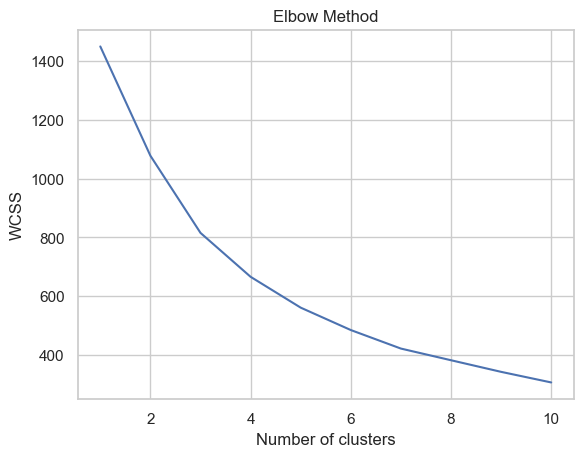

In [148]:
### Elbow method to find the best number of clusters


import matplotlib.pyplot as plt
import seaborn as sns

def plot_elbow_method(df, max_clusters):
    wcss = []
    for i in range(1, max_clusters):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)
    plt.plot(range(1, max_clusters), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(df_econded_scaled, 11)

Best clusterin K value is 4. We will use KMeans to cluster our data.

In [150]:
### cluster k=3

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(df_econded_scaled)


KMeans(n_clusters=3, n_init=10, random_state=0)

In [152]:
### Create a new column with the cluster number

df_econded['cluster'] = kmeans.labels_
df_econded.head()

,daysAgo,typeMapped,minSalary,maxSalary,title_encoded,company_encoded,location_encoded,cluster
0,22,0,8520.0,8520.0,368,132,1327,2
2,24,1,19200.0,21120.0,368,1081,1284,0
3,22,1,82000.0,84000.0,59,3125,904,1
4,23,1,19680.0,20160.0,396,4345,1308,0
6,22,0,9964.0,9964.0,0,871,879,2


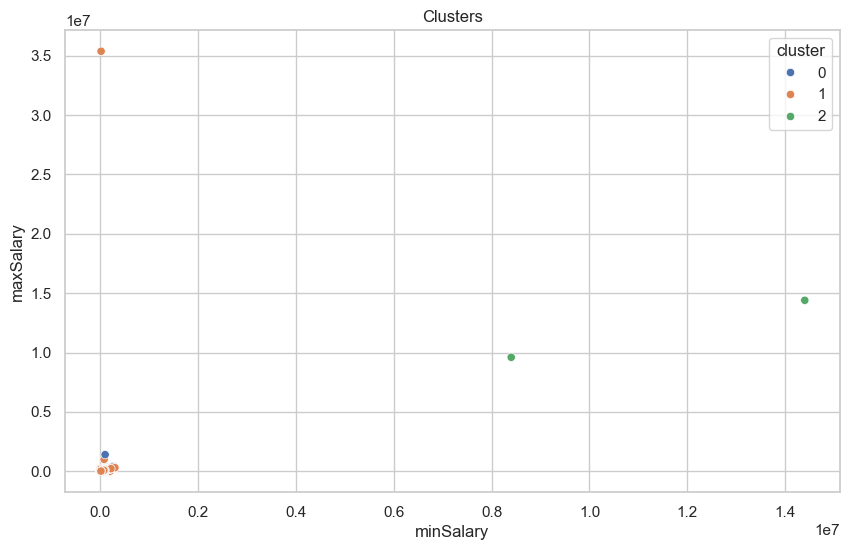

In [156]:
### Visualize the clusters

def plot_clusters(df, x, y, hue):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x=x, y=y, hue=hue, palette='deep')
    plt.title('Clusters')
    plt.show()

plot_clusters(df_econded, 'minSalary', 'maxSalary', 'cluster')

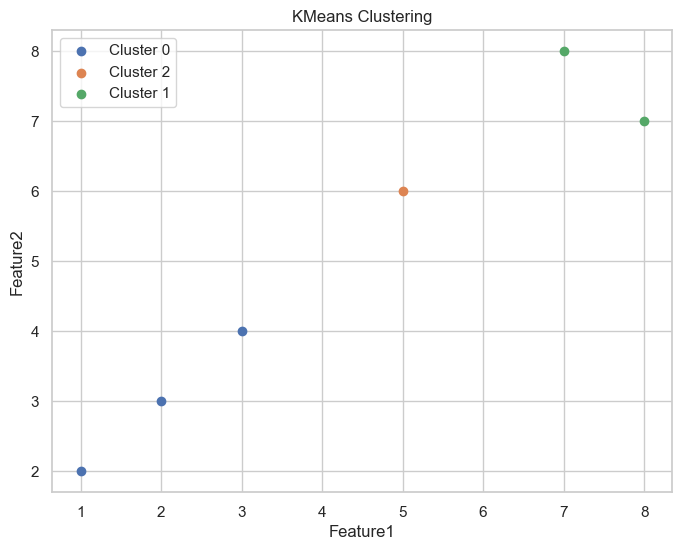